<a href="https://colab.research.google.com/github/hemanthkumar17/Graph_Machine_Learning/blob/main/MUTAG_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets
import torch; print(torch.__version__)
import torch; print(torch.version.cuda)
!pip install pyg-lib torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.13.1+cu116.html
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1.13.1+cu116
11.6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from datasets import load_dataset

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import time
dataset_hf = load_dataset("graphs-datasets/MUTAG")
# For the train set (replace by valid or test as needed)
dataset_pg_list = [Data(graph) for graph in dataset_hf["train"]]

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dataset_pg_list[0].items()

ItemsView({'x': {'edge_index': [[0, 0, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14, 14, 14, 15, 16], [1, 5, 0, 2, 1, 3, 2, 4, 9, 3, 5, 6, 0, 4, 4, 7, 6, 8, 7, 9, 13, 3, 8, 10, 9, 11, 10, 12, 11, 13, 14, 8, 12, 12, 15, 16, 14, 14]], 'node_feat': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]], 'edge_attr': [[1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], [1.0,

In [ ]:
import matplotlib.pyplot as plt

def draw_graph(graph):
    pos = nx.spring_layout(graph)
    plt.figure()
    nx.draw(
        graph, pos, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='pink', alpha=0.9,
        labels={node: node for node in graph.nodes()}
    )
    nx.draw_networkx_edge_labels(
        graph, pos,
        edge_labels=nx.get_edge_attributes(graph, 'key'),
        font_color='red'
    )
    plt.axis('off')
    plt.show()

In [ ]:
import networkx as nx
from itertools import combinations
import networkx.algorithms.isomorphism as iso
from tqdm import tqdm


In [ ]:
graph = nx.Graph()
graph.add_nodes_from([(x[0], {"key": x[1].index(1)}) for x in list(zip(list(range(dataset_pg_list[4]['x']['num_nodes'])), dataset_pg_list[4]['x']['node_feat']))])
for i in range(len(dataset_pg_list[4]["x"]["edge_index"][0])):
    graph.add_edge(dataset_pg_list[4]["x"]["edge_index"][0][i], dataset_pg_list[4]["x"]["edge_index"][1][i], key = [x.index(1) for x in dataset_pg_list[4]['x']['edge_attr']][i])

In [ ]:
# clique = list(nx.enumerate_all_cliques(graph))
# max_k = 5
# k_clique = [[] for x in range(1, max_k+1)]
# for c in clique:
#     k_clique.append(c)
print(nx.weisfeiler_lehman_graph_hash(graph, edge_attr = "key", node_attr = "key"))

248af77164045a95bc9936d3331d4b7d


In [ ]:
def check_iso(freq, subgraphs):
    visited = set()
    for sg in subgraphs:
        x = nx.weisfeiler_lehman_graph_hash(sg, edge_attr=nx.get_edge_attributes(sg, "key"), node_attr=nx.get_node_attributes(sg, "key"), iterations=3, digest_size=16)
        print(x)
        break
        # enc = []
        # sg_l = len(sg)
        # for i, c1 in list(enumerate(c_list)):
        #     if not visited[i]:
        #         pass
        # iso.is_isomorphic(graph.subgraph(next(clique)), graph.subgraph(next(clique)), node_match=lambda a, b: a['key'] == b['key'], edge_match = lambda a, b: a['key'] == b['key'])

In [ ]:
len(nx.weisfeiler_lehman_subgraph_hashes(graph, edge_attr = "key", node_attr = "key", iterations=100000)[2])

100000

In [ ]:
# Plots for each datapoint on different k vs time to compute based on the algorithm used
def plottime(time):
    plt.plot(range(1, len(time)+1), time)
    plt.title("Time to compute vs max number of nodes in subgraph")
    plt.xlabel("Number of nodes (k)")
    plt.ylabel("Time to compute")
    plt.show

In [ ]:
def getFreq(graph):
    freq = {}
    time_val = []
    n_nodes = 5 # Number of nodes in the subgraphs (here 3, as in your example)
    for n in range(1, n_nodes+1):
        start_time = time.time()
        subgraphs = [] # List for collecting the required subgraphs
        for nodes in combinations(graph.nodes, n):
            G_sub = graph.subgraph(nodes) # Create subgraph induced by nodes
            # subgraphs.append(G_sub)
            # Check for weak connectivity
            if nx.is_connected(G_sub):
                subgraphs.append(G_sub)
        for g in subgraphs:
            hash = nx.weisfeiler_lehman_graph_hash(g, edge_attr = "key", node_attr = "key")
            if hash not in freq:
                freq[hash] = [0, g]
            freq[hash][0] += 1            
        time_val.append(time.time() - start_time)
        # print(n, len(subgraphs))
    # print(freq)
    plottime(time_val)
    return freq

100%|██████████| 188/188 [02:04<00:00,  1.51it/s]


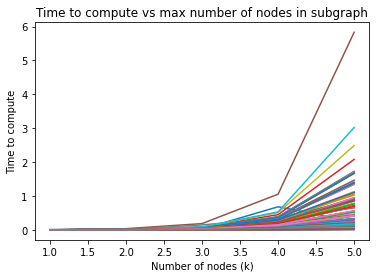

In [ ]:
freq = []
for n in tqdm(range(len(dataset_pg_list))):
    graph = nx.Graph()
    graph.add_nodes_from([(x[0], {"key": x[1].index(1)}) for x in list(zip(list(range(dataset_pg_list[n]['x']['num_nodes'])), dataset_pg_list[n]['x']['node_feat']))])
    for i in range(len(dataset_pg_list[n]["x"]["edge_index"][0])):
        graph.add_edge(dataset_pg_list[n]["x"]["edge_index"][0][i], dataset_pg_list[n]["x"]["edge_index"][1][i], key = [x.index(1) for x in dataset_pg_list[n]['x']['edge_attr']][i])
    freq.append((getFreq(graph), dataset_pg_list[n]["x"]["y"]))

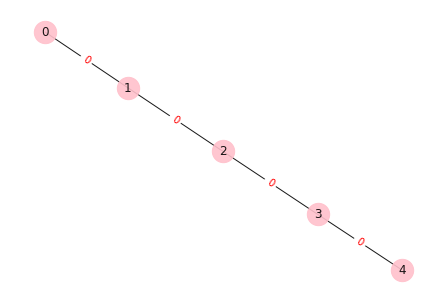

In [ ]:
draw_graph(freq[0][0]['1699ba84ae5ed97b0b06cc24af1e8256'][1])

In [ ]:
def dotProduct(freq1, freq2):
    inter = set(freq1.keys()).intersection(set(freq2.keys()))
    d = 0
    for hash in inter:
        d += freq1[hash][0] * freq2[hash][0]
    return d

In [ ]:
freq1 = []
freq2 = []

dsame = []
ddiff = []

for f, y in freq:
    if y[0] == 0:
        freq1.append(f)
    else:
        freq2.append(f)
for f1 in freq1:
    for f2 in freq1:
        dsame.append(dotProduct(f1, f2))
for f1 in freq2:
    for f2 in freq2:
        dsame.append(dotProduct(f1, f2))
for f1 in freq1:
    for f2 in freq2:
        ddiff.append(dotProduct(f1, f2))

In [ ]:
import numpy as np
ds = np.array(dsame)
dd = np.array(ddiff)
print(f"MEAN: Same: {np.mean(ds)}, Diff: {np.mean(dd)}\nSTD: Same: {np.std(ds)}, Diff: {np.std(dd)}")

MEAN: Same: 2434.933602123099, Diff: 1020.4134603174604
STD: Same: 2699.706468915159, Diff: 807.1235980779991


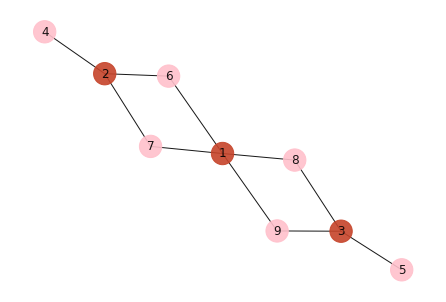

In [ ]:
new_graph = nx.Graph([(1, 6), (1, 7), (1, 8), (1, 9), (2, 4), (2, 6), (2, 7), (3, 5), (3, 8), (3, 9)])
color_map = ["#C6442A"] + ["pink"]*4 + ["#C6442A"] + ["pink"] + ["#C6442A"] + ["pink"]
pos = nx.spring_layout(new_graph)
plt.figure()
nx.draw(
    new_graph, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color=color_map, alpha=0.9,
    labels={node: node for node in new_graph.nodes()}
)
plt.axis('off')
plt.show()